In [22]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from src.data import make_dataset
from src.features import build_features
from src.models import train_model
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from matplotlib import pyplot
sns.set_style("darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
hour_df = make_dataset.get_raw_dataset('../data/raw')

# EDA

## Descriptive

In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## hour_df.head()

In [65]:
hour_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [67]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Types

In [10]:
interm_df = hour_df.copy()
interm_df = build_features.cast_column_type(interm_df)
interm_df = build_features.drop_columns(interm_df)
interm_df.dtypes

season        category
yr               int64
mnth          category
hr            category
holiday       category
weekday       category
workingday    category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object

## Outlier

[[Text(0, 0, 'spring'),
  Text(0, 0, 'summer'),
  Text(0, 0, 'fall'),
  Text(0, 0, 'winter')]]

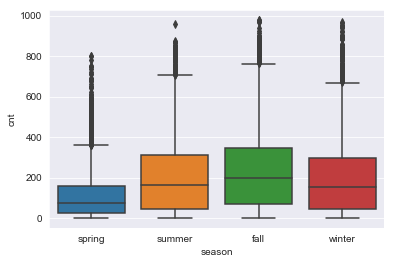

In [38]:
g = sns.boxplot(x='season', y='cnt', data=interm_df)
g.set(xticklabels=['spring', 'summer', 'fall', 'winter'])

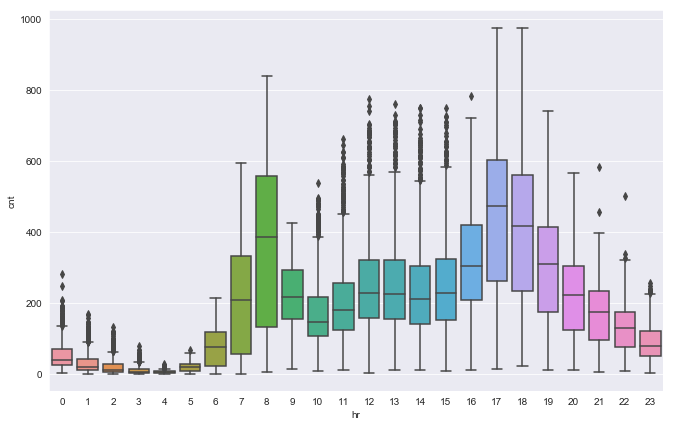

In [43]:
_, ax = pyplot.subplots(figsize=(11, 7))
g = sns.boxplot(ax=ax, x='hr', y='cnt', data=interm_df)

## Correlations

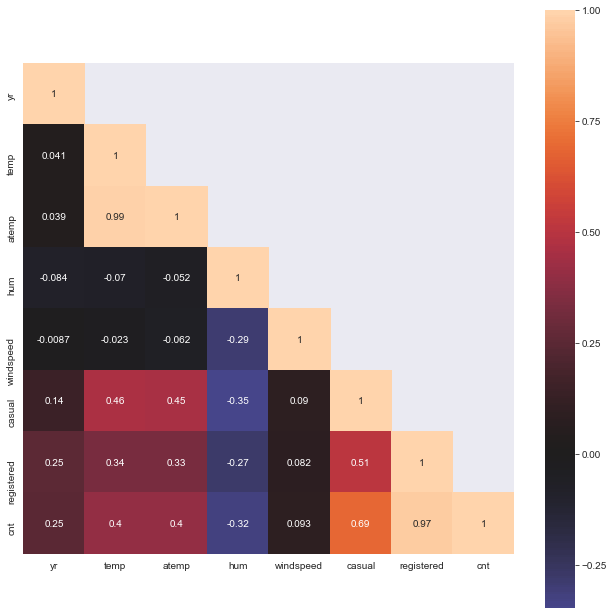

In [110]:
_, ax= pyplot.subplots(figsize=(11,11))

corr = interm_df.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
g = sns.heatmap(corr, annot=True, ax=ax, square=True, mask=mask, center=0)

## Distribution

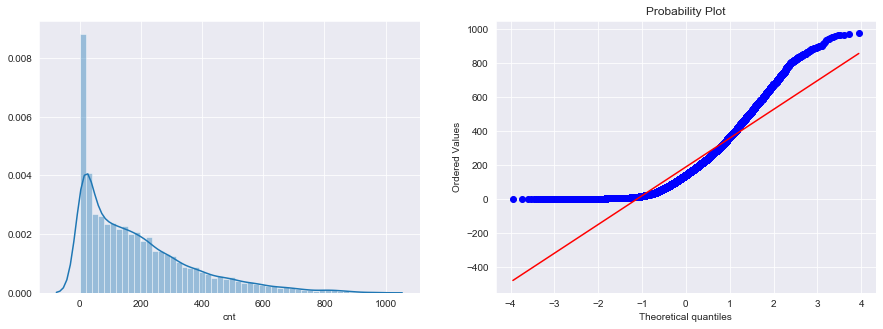

In [20]:
def plot_dist(df):
    _,ax = pyplot.subplots(ncols=2,nrows=1, figsize=(15, 5))
    sns.distplot(df["cnt"],ax=ax[0])
    stats.probplot(df["cnt"], dist='norm', fit=True, plot=ax[1])
    
plot_dist(interm_df)

## Visualization

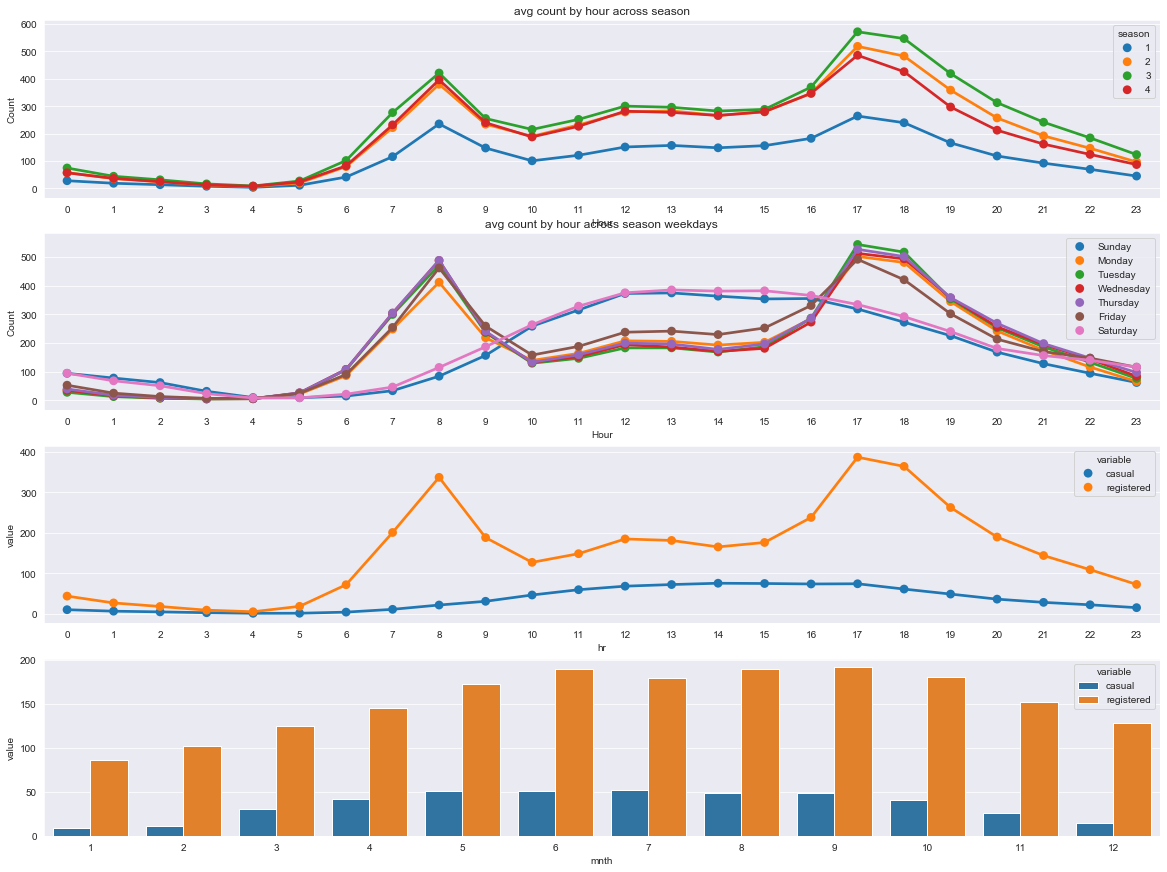

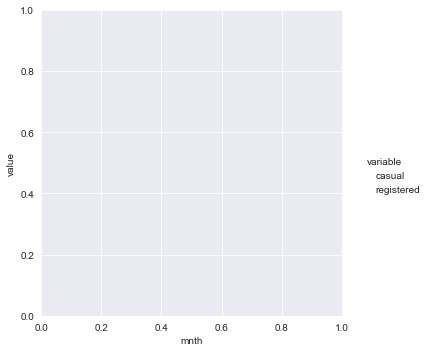

In [151]:
_,ax = pyplot.subplots(ncols=1,nrows=4, figsize=(20, 15))
day_label = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]
weather_label = ['Clear', 'Mist', 'Light', 'Heavy']
hours = pd.DataFrame(interm_df.groupby(["hr","season"])["cnt"].mean()).reset_index()
sns.pointplot(x=hours['hr'], y=hours["cnt"],hue=hours["season"], data=hours,ax=ax[0])
ax[0].set(xlabel='Hour', ylabel='Count',title="avg count by hour across season")

hours = pd.DataFrame(interm_df.groupby(["hr","weekday"])["cnt"].mean()).reset_index()
sns.pointplot(x=hours["hr"], y=hours["cnt"],hue=hours["weekday"], data=hours,ax=ax[1], legend_out = True)
ax[1].set(xlabel='Hour', ylabel='Count',title="avg count by hour across season weekdays")
handles, _ = ax[1].get_legend_handles_labels()
ax[1].legend(handles, day_label)

melted = pd.melt(interm_df[['hr','casual','registered']], id_vars=['hr'], value_vars=['casual', 'registered'])
hours = pd.DataFrame(melted.groupby(['hr', 'variable'])['value'].mean()).reset_index()
sns.pointplot(x=hours["hr"], y=hours["value"],hue=hours["variable"], data=hours,ax=ax[2], legend_out = True)

melted_month = pd.melt(interm_df[['mnth','casual','registered']], id_vars=['mnth'], value_vars=['casual', 'registered'])
month = pd.DataFrame(melted_month.groupby(['mnth', 'variable'])['value'].mean()).reset_index()
sns.catplot(x='mnth', y='value', hue='variable', data=month, ax=ax[3], kind='bar')

## Cleaning

(17379, 15)
(17135, 15)


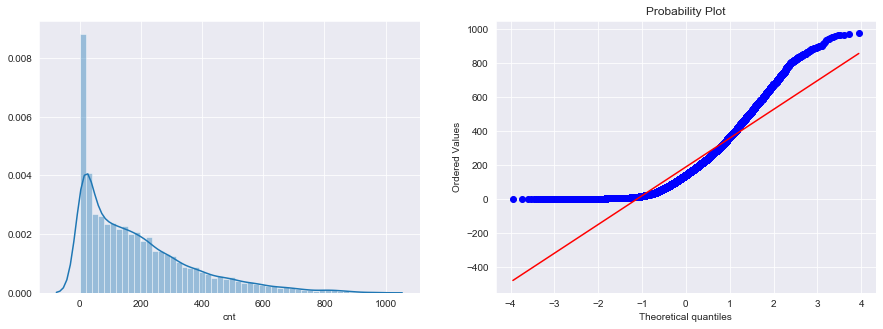

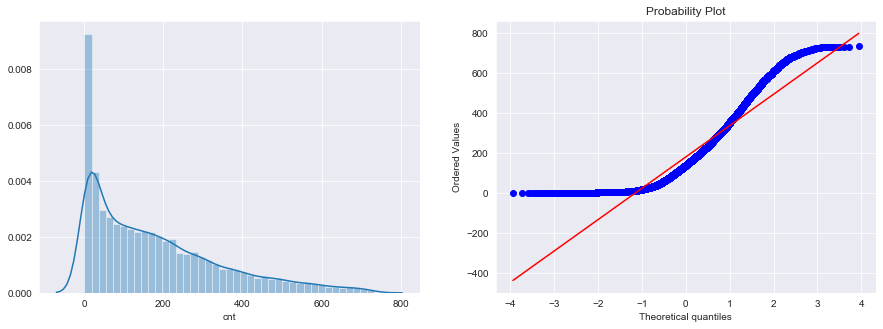

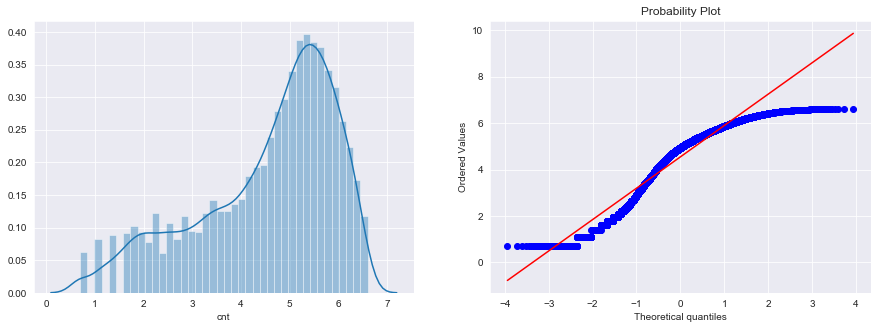

In [113]:
print(interm_df.shape)
no_outlier_df = interm_df[np.abs(interm_df["cnt"] - interm_df["cnt"].mean()) <= (3 * interm_df["cnt"].std())]
log_scale_df = np.log1p(no_outlier_df[['cnt']])
print(no_outlier_df.shape)
plot_dist(interm_df)
plot_dist(no_outlier_df)
plot_dist(log_scale_df)

## Windspeed

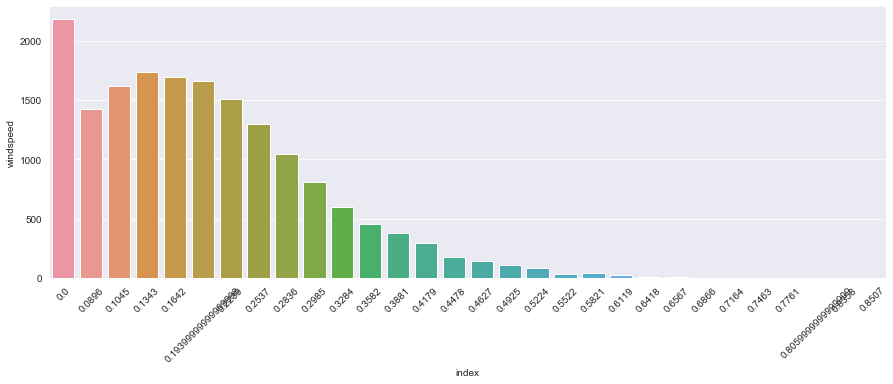

In [11]:
def plot_windspeed(df):
    windspeed_df = pd.DataFrame(df.windspeed.value_counts()).reset_index()
    _,ax = pyplot.subplots(figsize=(15, 5))
    pyplot.xticks(rotation=45) 
    sns.barplot(data=windspeed_df,x="index",y="windspeed")
    
plot_windspeed(interm_df)

In [12]:
from sklearn.ensemble import RandomForestClassifier

wind_cols= ['season', 'yr', 'mnth', 'weathersit', 'temp', 'hum']
df_windspeed_0 = interm_df[interm_df['windspeed'] == 0.0]
df_windspeed_not_0 = interm_df[interm_df['windspeed'] > 0.0]

assert len(df_windspeed_0) + len(df_windspeed_not_0) == len(interm_df)

df_windspeed_not_0['windspeed'] = df_windspeed_not_0['windspeed'].astype('str')

rf_windspeed = RandomForestClassifier()
rf_windspeed.fit(df_windspeed_not_0[wind_cols], df_windspeed_not_0['windspeed'])

pred_windspeed = rf_windspeed.predict(df_windspeed_0[wind_cols])

df_windspeed_0["windspeed"] = pred_windspeed
interm_df_windspeed = df_windspeed_not_0.append(df_windspeed_0)
interm_df_windspeed["windspeed"] = interm_df_windspeed["windspeed"].astype("float")
interm_df_windspeed.reset_index(inplace=True)
interm_df_windspeed.drop('index',inplace=True,axis=1)

/Users/georges/.pyenv/versions/bikeshare/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/georges/.pyenv/versions/bikeshare/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


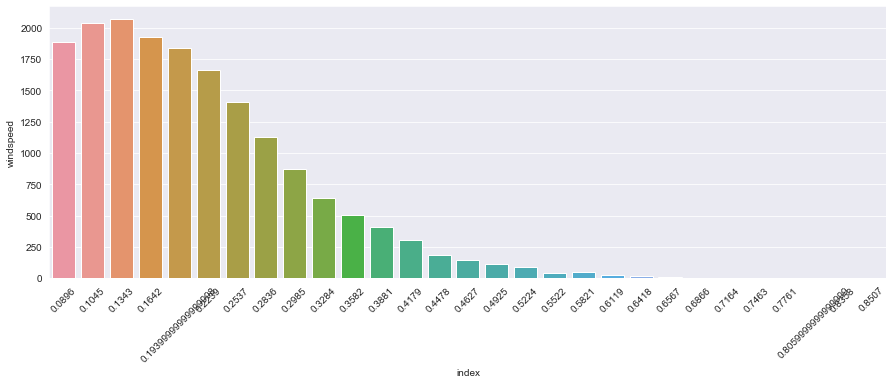

In [13]:
plot_windspeed(interm_df_windspeed)

## Model

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn.gaussian_process import GaussianProcessRegressor

split_ration = 0.2
seed = 42
columns_to_drop = ['cnt', 'atemp', 'casual', 'registered']

data = interm_df_windspeed
#y = data['cnt']
#data = data.drop(columns_to_drop, axis=1)

In [15]:
def plot_compare_density(y, pred, bins=100):
    _,ax = pyplot.subplots(ncols=2,nrows=1, figsize=(15, 5))
    sns.distplot(y,ax=ax[0], bins=bins)
    sns.distplot(pred ,ax=ax[1], bins=bins)

## Pipeline

In [16]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV

SEED=42
np.random.seed(SEED)
import random
random.seed(SEED)

In [72]:
X, y, pipeline = build_features.build_sklearn_pipline(data)
result = train_model.cross_val(pipeline,X,y,train_model.rmsle,10, return_estimator=True, return_train_score=True, n_jobs=-1)
result

{'fit_time': array([172.85713625, 173.27929401, 173.06409597, 173.03845191,
        170.40090203, 170.68042302, 170.61033392, 171.03240991,
         93.273839  ,  92.2719183 ]),
 'score_time': array([0.09680986, 0.09337306, 0.09178209, 0.09209323, 0.10166073,
        0.09691691, 0.09001231, 0.0858202 , 0.05728793, 0.06035972]),
 'estimator': (Pipeline(memory=None,
           steps=[('columntransformer',
                   ColumnTransformer(n_jobs=None, remainder='drop',
                                     sparse_threshold=0.3,
                                     transformer_weights=None,
                                     transformers=[('cat_features',
                                                    OneHotEncoder(categories='auto',
                                                                  drop=None,
                                                                  dtype=<class 'numpy.float64'>,
                                                                  handle_unk

In [73]:
np.mean(result['test_score']), result['test_score'], result['train_score'] 

(0.33221218665030544,
 array([0.4151636 , 0.34373602, 0.27632008, 0.36149679, 0.37407546,
        0.33286485, 0.27932174, 0.25032228, 0.36968028, 0.31914078]),
 array([0.21818758, 0.22297103, 0.22648681, 0.22187996, 0.21835647,
        0.22190594, 0.22605175, 0.22809104, 0.21843551, 0.22176182]))

In [28]:
X, y, pipeline = build_features.build_sklearn_pipline(data)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=split_ration, random_state=seed)
pipeline.fit(X_train, np.log(y_train))
pred = pipeline.predict(X_test)
score = train_model.rmsle(np.log(y_test), pred)
print(score)


0.30570683854056785


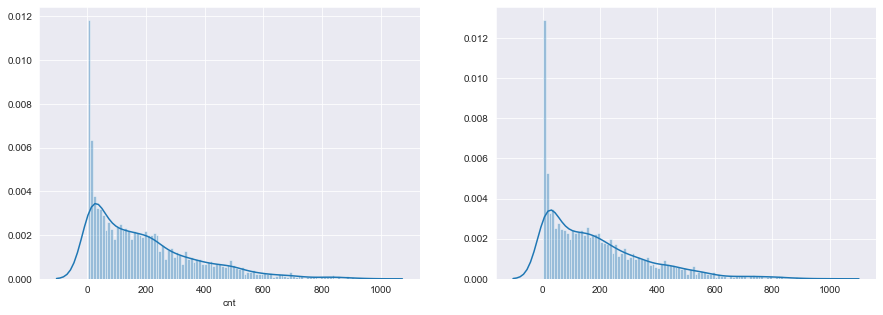

In [30]:
plot_compare_density(y_test, np.exp(pred))

In [75]:
train_model.mean_absolute_deviation(y_test), train_model.mean_absolute_deviation(np.exp(pred))

(142.2114582188434, 138.46006308797294)

## Feature Importance

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 <a list of 60 Text xticklabel objects>)

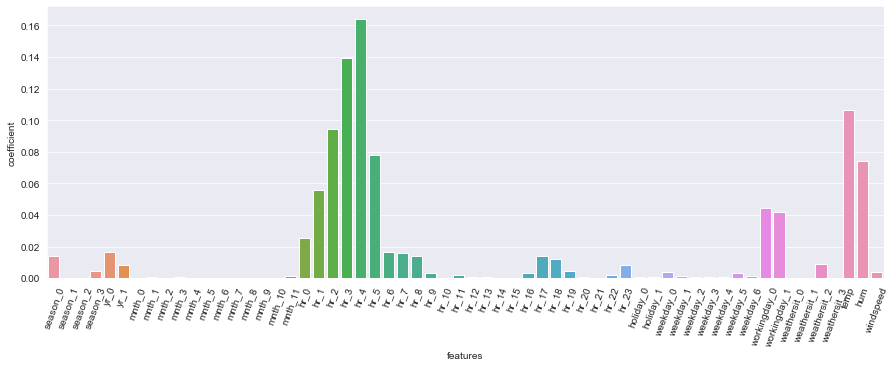

In [31]:
from itertools import chain
cat_feat = ['season', 'yr','mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit']
cat_feat_count = [len(X_train[cat].unique()) for cat in cat_feat]
cat_feat_count = [list(range(count)) for count in cat_feat_count]
cat_feat_count = [ [ cat + '_' + str(count) for count in counts ] for cat, counts in zip(cat_feat, cat_feat_count)]
cat_feat_count = list(chain(*cat_feat_count))

features = pd.DataFrame()
features['features'] = cat_feat_count + ['temp', 'hum', 'windspeed']
features['coefficient'] = pipeline['gradientboostingregressor'].feature_importances_
#features.sort_values(by=['coefficient'],ascending=False,inplace=True)

fig,ax = pyplot.subplots(figsize=(15, 5))
sns.barplot(data=features,x="features",y="coefficient",ax=ax)
pyplot.xticks(rotation=70)